In [14]:
import numpy as np
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

import random as rnd
import os
import math

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

from pprint import pprint
import functools as ft

initialization  
$
\newcommand{\E}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
\newcommand{\H}[1]{\mathbb{H}\left[#1\right]}
\newcommand{\cov}[1]{\text{cov} \sigma\left[#1\right]}
\newcommand{\EXP}[1]{\exp\left\{#1\right\}} 
\newcommand{\LN}[1]{\ln\left\{#1\right\}} 
\newcommand{\P}{\mathbb{P}}
\newcommand{\underl}[1]{\text{$\underline{#1}$}}
\newcommand{\fracone}[1]{\frac{1}{#1}}
\newcommand{\half}{\fracone{2}}
\newcommand{\Lim}[1]{\displaystyle \lim_{#1}}
\newcommand{\Norm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\inv}[1]{#1^{-1}}
\newcommand{\invp}[1]{\left({#1}\right)^{-1}}
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
\newcommand{\ml}[1]{#1_{\text{ML}}}
\newcommand{\Partial}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\KL}[2]{\text{KL}\left(#1 \Vert #2\right)}
\newcommand{\MI}[1]{\mathcal{I}\left(#1\right)}
\newcommand{\Ln}[1]{\ln \left\(#1\right\)}
\newcommand{\Lnb}[1]{\ln \left\{#1\right\} }
\newcommand{\Mod}[1]{\left|#1\right|}
$

$
\newcommand{\mat}[1]{ \left[ \begin{matrix} #1 \end{matrix} \right] }
\newcommand{\matp}[1]{ \left( \begin{matrix} #1 \end{matrix} \right)}
\newcommand{\mats}[1]{ \begin{matrix}#1\end{matrix} }
$

$\newcommand{\arrthree}[1]{
\begin{array}{rlr} #1 \end{array}}
$

$
\newcommand{\C}{\mathbb{C}}
\newcommand{\Ca}{\mathcal{C}}
\newcommand{\D}{\mathcal{D}}
\newcommand{\G}{\mathcal{G}}
\newcommand{\I}{\mathcal{I}}
\newcommand{\L}{\mathcal{L}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\Ra}{\mathcal{R}}
$

$
\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}
$



sum, product
$
\newcommand{\sumiN}{\displaystyle \sum_{i=1}^{N}}
\newcommand{\sumjD}{\displaystyle \sum_{j=1}^{D}}
\newcommand{\sumjK}{\displaystyle \sum_{j=1}^{K}}
\newcommand{\sumjMl}{\sum_{j=1}^{M-1}}
\newcommand{\sumkK}{\displaystyle \sum_{k=1}^{K}}
\newcommand{\sumkM}{\displaystyle \sum_{k=1}^{M}}
\newcommand{\sumkMl}{\sum_{k=1}^{M-1}}
\newcommand{\summN}{\displaystyle \sum_{m=1}^{N}}
\newcommand{\sumnN}{\displaystyle \sum_{n=1}^{N}}
$
$
\newcommand{\prodiN}{\displaystyle \prod_{i=1}^{N}}
\newcommand{\prodjK}{\displaystyle \prod_{j=1}^{K}}
\newcommand{\prodkK}{\displaystyle \prod_{k=1}^{K}}
\newcommand{\prodmN}{\displaystyle \prod_{m=1}^{N}}
\newcommand{\prodnN}{\displaystyle \prod_{n=1}^{N}}
$

alphabet bold,
$
\newcommand{\ab}{\mathbf{a}}
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\Ai}{\inv{\Ab}}
\newcommand{\At}{\Ab^T}
\newcommand{\Abjk}{\Ab_{jk}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\bt}{\bb^T}
\newcommand{\Bb}{\mathbf{B}}
\newcommand{\Bt}{\Bb^T}
\newcommand{\Cb}{\mathbf{C}}
\newcommand{\Db}{\mathbf{D}}
\newcommand{\fb}{\mathbf{f}}
\newcommand{\fp}{f^{\prime}}
\newcommand{\Hb}{\mathbf{H}}
\newcommand{\Jb}{\mathbf{J}}
\newcommand{\Kb}{\mathbf{K}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lt}{\Lb^T}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\mt}{\mb^T}
\newcommand{\Mb}{\mathbf{M}}
\newcommand{\Qb}{\mathbf{Q}}
\newcommand{\Rb}{\mathbf{R}}
\newcommand{\Sb}{\mathbf{S}}
\newcommand{\tb}{\mathbf{t}}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Ub}{\mathbf{U}}
\newcommand{\Ut}{\Ub^T}
\newcommand{\vb}{\mathbf{v}}
\newcommand{\Vb}{\mathbf{V}}
\newcommand{\wb}{\mathbf{w}}
\newcommand{\wt}{\wb^T}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\Xt}{\Xb^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xt}{\xb^T}
\newcommand{\xp}{x^{\prime}}
\newcommand{\xbp}{\xb^{\prime}}
\newcommand{\xbm}{\xb_m}
\newcommand{\xbn}{\xb_n}
\newcommand{\xab}{\mathbf{x_a}}
\newcommand{\xabt}{\mathbf{x_a}^T}
\newcommand{\xbb}{\mathbf{x_b}}
\newcommand{\xbbt}{\mathbf{x_b}^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\yt}{\yb^T}
\newcommand{\zb}{\mathbf{z}}
\newcommand{\zt}{\zb^T}
\newcommand{\zbm}{\zb_m}
\newcommand{\zbn}{\zb_n}
\newcommand{\zbnp}{\zb_{n-1}}
\newcommand{\znk}{\zb_{nk}}
\newcommand{\znpj}{\zb_{n-1,j}}
\newcommand{\Zb}{\mathbf{Z}}
$

math bold
$
\newcommand{\chib}{\boldsymbol{\chi}}
\newcommand{\etab}{\pmb{\eta}}
\newcommand{\etat}{\eta^T}
\newcommand{\etabt}{\etab^T}
\newcommand{\laa}{\Lambda_{aa}}
\newcommand{\laai}{\Lambda_{aa}^{-1}}
\newcommand{\lab}{\Lambda_{ab}}
\newcommand{\lba}{\Lambda_{ba}}
\newcommand{\lbb}{\Lambda_{bb}}
\newcommand{\lbbi}{\Lambda_{bb}^{-1}}
\newcommand{\li}{\lambda_i}
\newcommand{\Li}{\Lambda^{-1}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\mut}{\mub^T}
\newcommand{\muab}{\pmb{\mu}_a}
\newcommand{\mubb}{\pmb{\mu}_b}
\newcommand{\pib}{\pmb{\pi}}
\newcommand{\saa}{\Sigma_{aa}}
\newcommand{\sab}{\Sigma_{ab}}
\newcommand{\sba}{\Sigma_{ba}}
\newcommand{\sbb}{\Sigma_{bb}}
\newcommand{\thetab}{\pmb{\theta}}
\newcommand{\thetat}{\thetab^T}
\newcommand{\thetabh}{\hat{\thetab}}
\newcommand{\thetaold}{\thetab^{\text{old}}}
$

$
\newcommand{\zerob}{\pmb{0}}
$


aliases for distributions
$\newcommand{\multivarcoeff}{\frac{1}{(2\pi)^{D/2}}
\frac{1}{\left| \mathbf{\Sigma}\right|^{1/2}}}$
$\newcommand{\multivarexp}[2]
{
\left\{
 -\frac{1}{2} 
 {#1}^T 
 #2
 {#1}
\right\}
}$
$\newcommand{\multivarexpx}[1]{\multivarexp{#1}{\Sigma^{-1}}}$
$\newcommand{\multivarexpstd}{\multivarexpx{(\xb-\mub)}}$
$\newcommand{\gam}{\operatorname{Gam}}$

$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\Nstdx}{\Nl{\mathbf{x}}{\mathbf{\mu}}{\Sigma}}
$

In [3]:
HTML("<style>"\
    "div.cell{"\
        "width:50%;"\
        "margin-left:25%;"\
        "margin-right:auto;"\
    "}"\
"</style>")

# General form

$\displaystyle f(x) = \frac{\Gamma(\frac{\nu+1}{2})}{\Gamma(\frac{\nu}{2})}
(1+\frac{x^2}{\nu})^{-\frac{\nu+1}{2}}
$

Here, $\nu$ is the #degrees of freedom

* Has thicker tails than Gaussian
* Becomes Gaussian at $\nu = \infty$
* Becomes [Cauchy distribution](http://www.wikiwand.com/en/Cauchy_distribution) at $\nu = 1$

If we take a sample of n observations from a normal distribution, then the t-distribution with $\nu=n-1$ degrees of freedom can be defined as the distribution of the location of the true mean, relative to the sample mean and divided by the sample standard deviation, after multiplying by the normalizing term $\sqrt{n}$. In this way, the t-distribution can be used to estimate how likely it is that the true mean lies in any given range.

Let $x_1, ..., x_n$ be the numbers observed in a sample from a continuously distributed population with expected value $\mu$. The sample mean and sample variance are given by:

$$
\begin{align}
\bar{x} &= \frac{x_1+\cdots+x_n}{n} \\
s^2 &= \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2
\end{align}
$$

The resulting t-value is
$t = \frac{\bar{x} - \mu}{s/\sqrt{n}}.$

# Uses

Student's t-distribution arises in a variety of statistical estimation problems where the goal is to estimate an unknown parameter, such as a mean value, in a setting where the data are observed with additive errors. If (as in nearly all practical statistical work) the population standard deviation of these errors is unknown and has to be estimated from the data, the t-distribution is often used to account for the extra uncertainty that results from this estimation. In most such problems, if the standard deviation of the errors were known, a normal distribution would be used instead of the t-distribution.

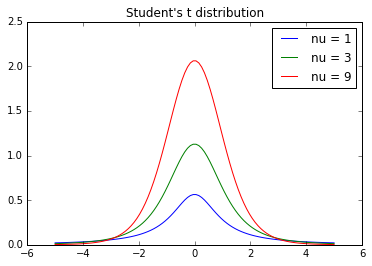

In [2]:
def compute_students_t(x, v):
    term1 = math.gamma((v+1)/2) / math.gamma(v/2)
    term2 = (1 + x**2/v) ** (-((v+1)/2))
    return term1*term2

def show_students_t(v):
    x = np.linspace(-5,5,100)
    y = [compute_students_t(xx, v) for xx in x]
    plt.plot(x, y)
    plt.show()
    
arr_v = [1,3,9]
x = np.linspace(-5,5,100)
for vv in arr_v:
    plt.plot(x, [compute_students_t(xx,vv) for xx in x], 
             label='nu = ' + str(vv))
    
plt.legend()
plt.title("Student\'s t distribution")
plt.show()
    
#interact(show_students_t, v=(1,100))

$\displaystyle f(x) =
\frac
{\Gamma(\frac{\nu+1}{2})}
{\sqrt{\nu \pi} ~~ \Gamma(\frac{\nu}{2})}
(1+\frac{x^2}{\nu})^{-\frac{\nu+1}{2}}
$

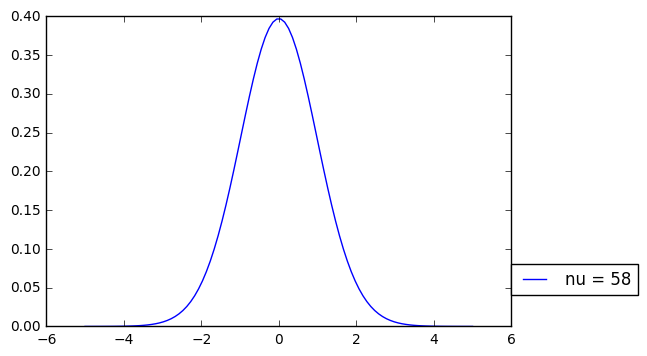

In [11]:
def compute_students_t(x, v):
    coeff = math.gamma((v+1)/2.) / (math.sqrt(v * math.pi) * math.gamma(v/2.))
    term = (1 + x**2/(v*1.))**(-(v+1)/2.)
    return coeff * term

def plot_all_students_t(vs,plot_all=True):
    vs = [1,3,9] if plot_all else [vs]
    x = np.linspace(-5,5,100)
    for v in vs:
        y = compute_students_t(x, v)
        plt.plot(x, y, label='nu = '+str(v))
    plt.legend(loc=(1,0.1))
    plt.show()
    
interact(plot_all_students_t, vs=(1,100))

In [24]:
stats.t.ppf(1-0.025,58)

2.0017174830120923

In [37]:
1 - stats.f.cdf(1.67,4,58)

0.16927935111708448

In [31]:
?stats.f.cdf

In [34]:
stats.f.ppf(1-0.025, 4, 58)

3.0156619898516097